In [ ]:
pip install ucimlrepo

# **CItation**

In [ ]:
@misc{misc_heart_disease_45,
  author       = {Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert},
  title        = {{Heart Disease}},
  year         = {1988},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C52P4X}
}

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
R
# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the heart disease dataset
heart_disease = fetch_ucirepo(id=45)

# Data and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Extracting feature names
feature_names = heart_disease.variables[heart_disease.variables['role'] == 'Feature']['name'].tolist()

# Convert the dataset to a pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)

# Initial dataset size
initial_rows, initial_cols = df.shape

# Handle null values
null_values_count = df.isnull().sum().sum()
if null_values_count > 0:
    print(f"{null_values_count} null values found in the dataset. Handling null values...")
    df.dropna(inplace=True)
    print("Null values have been removed.")

# Handle duplicates
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print(f"{duplicates_count} duplicate rows found in the dataset. Handling duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

# Updated dataset size
updated_rows, updated_cols = df.shape

# Display basic information about the dataset after cleaning
print("\nDataset Information After Cleaning:")
print(df.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(df.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")

6 null values found in the dataset. Handling null values...
Null values have been removed.

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 32.5 KB
None

Summary Statistics After Cleaning:
              age         sex          cp    trestbps        chol         fbs  \
count  297.00

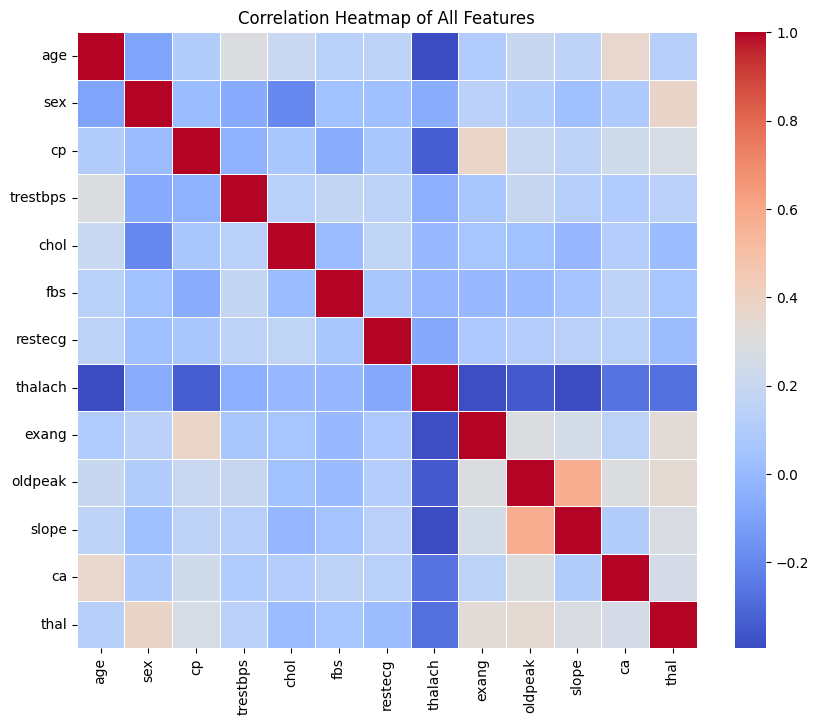

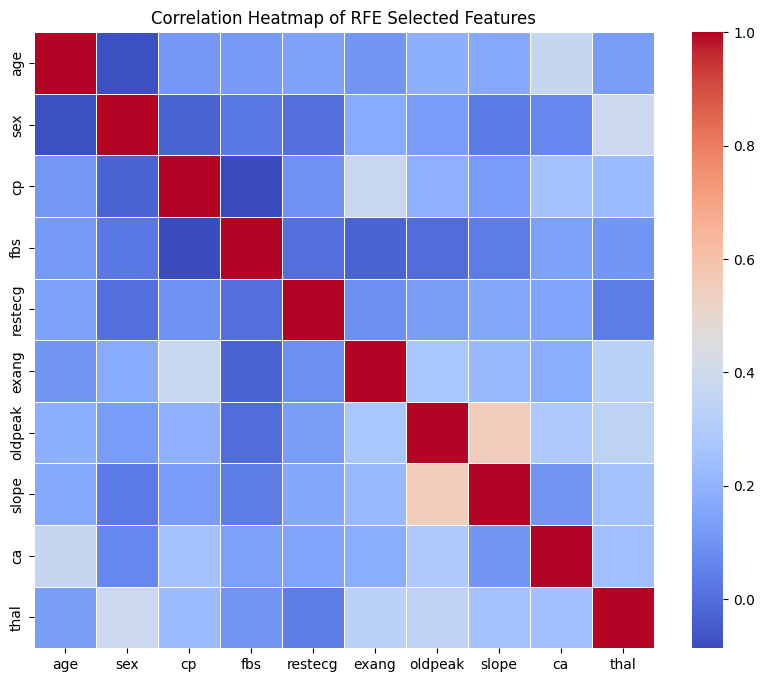

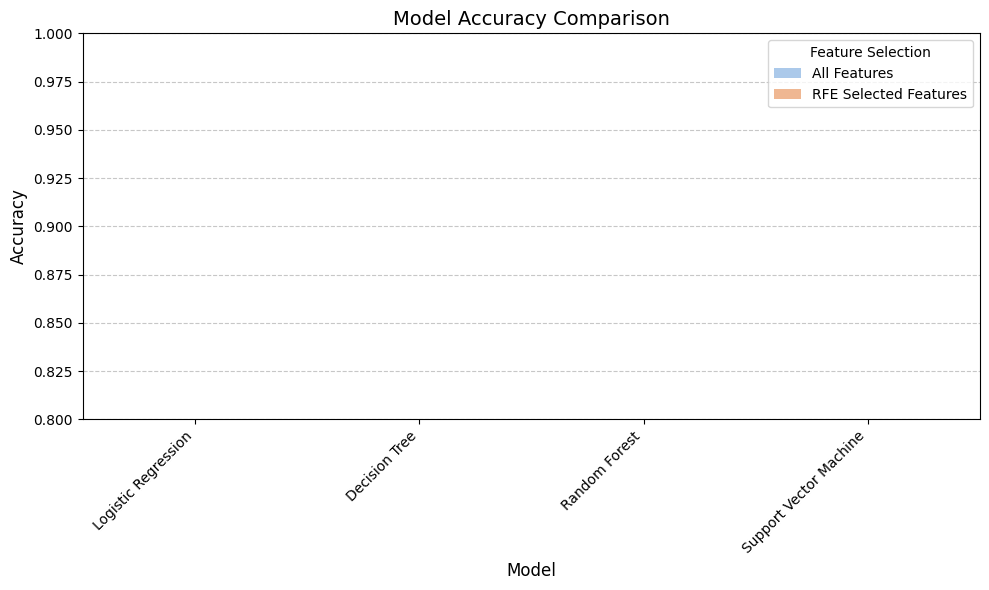

In [ ]:
# Calculate correlation matrix for all features
correlation_matrix_all = df.corr()

# Plot correlation heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the target variable y
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

# Drop samples with missing values
X_train.dropna(inplace=True)
X_train.reset_index(drop=True, inplace=True)  # Reset index after dropping NaNs
y_train = y_train[X_train.index]

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train, y_train)

# Drop samples with missing values in testing data
X_test.dropna(inplace=True)
X_test.reset_index(drop=True, inplace=True)  # Reset index after dropping NaNs

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected, columns=[feature_names[i] for i, selected in enumerate(rfe.support_) if selected])

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

random_seed = 42

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed)
}

# Drop samples with missing values in testing data
X_test.dropna(inplace=True)
X_test.reset_index(drop=True, inplace=True)  # Reset index after dropping NaNs

# Ensure y_test has the same number of samples as X_test after preprocessing
y_test = y_test[:len(X_test)]

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy


# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Plotting
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection', palette='pastel')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.8, 1.0)
plt.legend(title='Feature Selection', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Print scores before RFE
print("Scores with all features and without any added techniques:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Print scores after RFE
print("\nScores with RFE-selected features:")
for name, accuracy in results_rfe_selected_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

Scores with all features and without any added techniques:
Logistic Regression: 41.67%
Decision Tree: 21.67%
Random Forest: 48.33%
Support Vector Machine: 48.33%

Scores with RFE-selected features:
Logistic Regression: 41.67%
Decision Tree: 33.33%
Random Forest: 48.33%
Support Vector Machine: 48.33%


In [ ]:
# Get the feature names
all_feature_names = df.columns
eliminated_features = all_feature_names[~rfe.support_]
selected_features = all_feature_names[rfe.support_]

print("Eliminated Features:")
print(eliminated_features)

print("\nSelected Features:")
print(selected_features)

Eliminated Features:
Index(['trestbps', 'chol', 'thalach'], dtype='object')

Selected Features:
Index(['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')


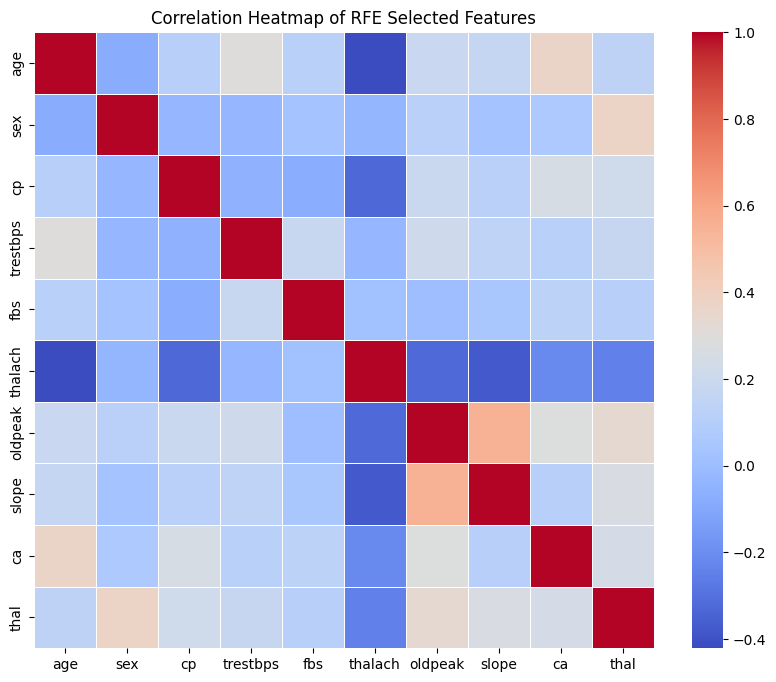

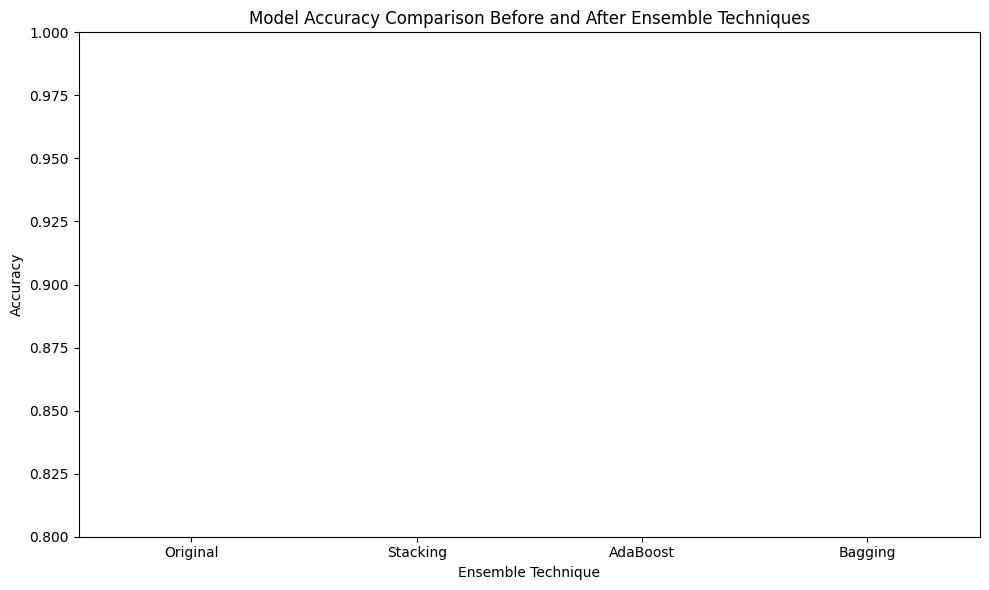

Summary of Model Accuracies:
Original: 0.5246
Stacking: 0.5410
AdaBoost: 0.5738
Bagging: 0.5410


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the heart disease dataset
heart_disease = fetch_ucirepo(id=45)

# Data and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Extracting feature names
feature_names = heart_disease.variables[heart_disease.variables['role'] == 'Feature']['name'].tolist()

# Convert the dataset to a pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train_scaled, y_train.values.ravel())  # Reshape y to a 1D array

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected, columns=[feature_names[i] for i, selected in enumerate(rfe.support_) if selected])

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train.values.ravel())  # Reshape y to a 1D array
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Find the highest performing model
highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]

# Train and evaluate the highest performing model with RFE-selected features
highest_model.fit(X_train_selected, y_train.values.ravel())  # Reshape y to a 1D array
accuracy_highest = highest_model.score(X_test_selected, y_test)

# Apply ensemble techniques to the highest performing model
# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=LogisticRegression(max_iter=1000))
stacking_model.fit(X_train_selected, y_train.values.ravel())  # Reshape y to a 1D array
stacking_accuracy = stacking_model.score(X_test_selected, y_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators=100)
adaboost_model.fit(X_train_selected, y_train.values.ravel())  # Reshape y to a 1D array
adaboost_accuracy = adaboost_model.score(X_test_selected, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators=100)
bagging_model.fit(X_train_selected, y_train.values.ravel())  # Reshape y to a 1D array
bagging_accuracy = bagging_model.score(X_test_selected, y_test)

# Plotting
models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques')
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Load the heart disease dataset
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)

# Data and target
X = heart_disease.data.features
y = heart_disease.data.targets
feature_names = heart_disease.data.feature_names

# Convert the dataset to a pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y  # Add target column to the DataFrame

# Remove outliers
Q1 = df.drop(columns=['target']).quantile(0.25)
Q3 = df.drop(columns=['target']).quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df.drop(columns=['target']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['target']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Replace infinite values with NaNs
X_imputed[~np.isfinite(X_imputed)] = np.nan

# Drop rows with any NaN values
df_no_missing = df.dropna()

# Remove multicollinearity using VIF
def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X, ix) for ix in range(X.shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping column with VIF={max_vif}")
            X = np.delete(X, maxloc, axis=1)
            variables.remove(maxloc)
            dropped = True
    print(f'Remaining variables: {variables}')
    return X

X_no_multicollinearity = calculate_vif(X_imputed[df_no_missing.index])

# Print features before and after removing multicollinearity
print(f"Features before removing multicollinearity: {X_imputed.shape[1]}")
print(f"Features after removing multicollinearity: {X_no_multicollinearity.shape[1]}")



Dropping column with VIF=60.51032602357746
Dropping column with VIF=32.427562380036136
Dropping column with VIF=22.234311597078417
Dropping column with VIF=12.483397594417676
Dropping column with VIF=10.325518421647958
Dropping column with VIF=9.10979710948435
Remaining variables: [4, 5, 8, 9, 10, 11, 12]
Features before removing multicollinearity: 13
Features after removing multicollinearity: 7


In [ ]:
# Check the shape of the DataFrame after dropping the 'target' column
print(df_no_outliers.drop(columns=['target']).shape)
print(df_no_outliers.drop(columns=['target']).columns)


(216, 13)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
# Replace infinite values with NaNs
X_imputed[~np.isfinite(X_imputed)] = np.nan

# Drop rows with any NaN values
df_no_missing = df.dropna()

# Remove multicollinearity using VIF
def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X, ix) for ix in range(X.shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping column with VIF={max_vif}")
            X = np.delete(X, maxloc, axis=1)
            variables.remove(maxloc)
            dropped = True
    print(f'Remaining variables: {variables}')
    return X

X_no_multicollinearity = calculate_vif(X_imputed[df_no_missing.index])

# Print features before and after removing multicollinearity
print(f"Features before removing multicollinearity: {X_imputed.shape[1]}")
print(f"Features after removing multicollinearity: {X_no_multicollinearity.shape[1]}")


Dropping column with VIF=60.51032602357746
Dropping column with VIF=32.427562380036136
Dropping column with VIF=22.234311597078417
Dropping column with VIF=12.483397594417676
Dropping column with VIF=10.325518421647958
Dropping column with VIF=9.10979710948435
Remaining variables: [4, 5, 8, 9, 10, 11, 12]
Features before removing multicollinearity: 13
Features after removing multicollinearity: 7


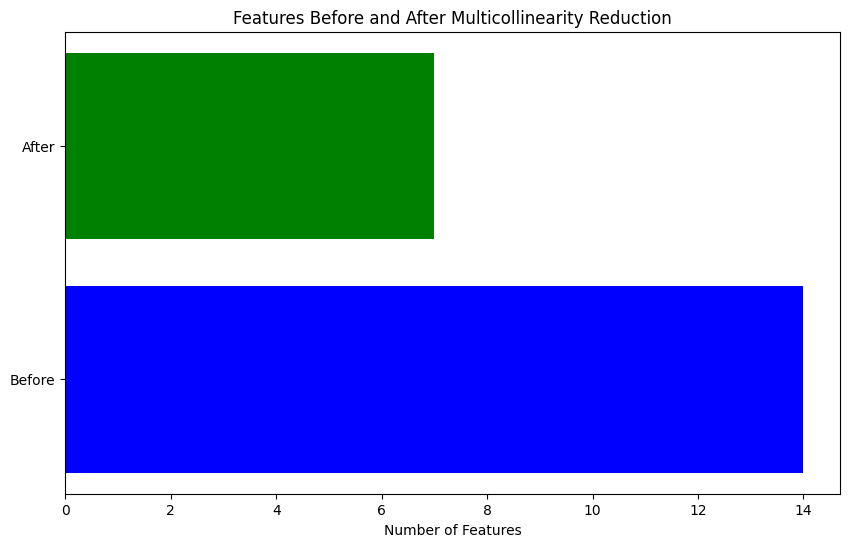

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot features before and after
def plot_features(before_features, after_features, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(['Before', 'After'], [before_features, after_features], color=['blue', 'green'])
    ax.set_xlabel('Number of Features')
    ax.set_title(title)
    plt.show()

# Get the number of columns in the NumPy array
num_columns_before = df_no_outliers.shape[1]
num_columns_after = X_no_multicollinearity.shape[1]

# Call the function to plot features before and after
plot_features(num_columns_before, num_columns_after, 'Features Before and After Multicollinearity Reduction')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

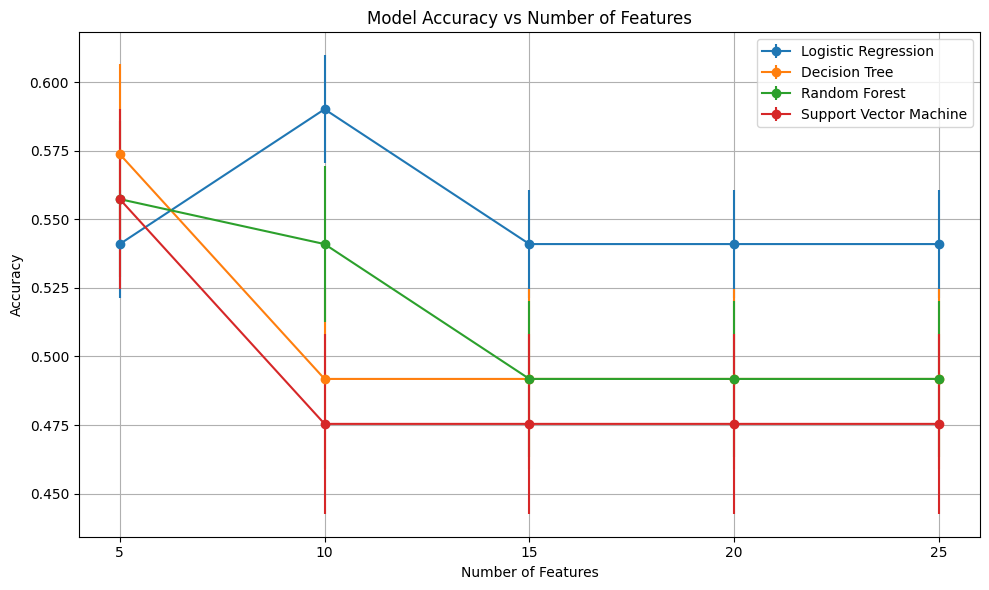

Summary of Model Accuracies:
Original: 0.5246
Stacking: 0.5410
AdaBoost: 0.5738
Bagging: 0.5410


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Load the heart disease dataset
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)

# Data and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Initialize lists to store results
results = []

# Loop through different numbers of features
for num_features in [5, 10, 15, 20, 25]:
    # Create RFE object and specify the number of features to select
    rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=num_features)

    # Fit RFE to training data (excluding the target variable)
    rfe.fit(X_train, y_train)

    # Transform the training and testing data to include only the selected features
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    # Train and evaluate models with RFE-selected features
    model_results = {}
    for name, model in models.items():
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, predictions)
        model_results[name] = accuracy

    # Store results
    results.append((num_features, model_results))

# Calculate mean and standard deviation of accuracy scores for each model
mean_accuracies = {name: np.mean([model_results[name] for _, model_results in results]) for name in models}
std_accuracies = {name: np.std([model_results[name] for _, model_results in results]) for name in models}

# Plotting with error bars
plt.figure(figsize=(10, 6))
for name, _ in models.items():
    accuracies = [model_results[name] for _, model_results in results]
    plt.errorbar([num_features for num_features, _ in results], accuracies, yerr=[std_accuracies[name] for _ in results], marker='o', label=name)

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of Features')
plt.legend()
plt.grid(True)
plt.xticks([5, 10, 15, 20, 25])
plt.tight_layout()
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")
